## Quiz8
#### Peeraya Khantaruangsakul 63070501054

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Use the “PCA Examples.ipynb” for the following:
### 1. [15 points. 1 hour.] Using the Wine dataset, use PCA to reduce it to 2 PCA features.

In [2]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

data_wine = load_wine()
X_wine = data_wine.data
y_wine = data_wine.target

#### 1.1. Visualize the first 2 columns as a scatter plot using all (100%) of the data.

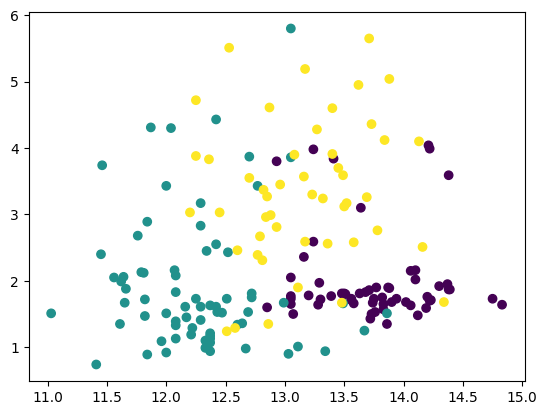

In [3]:
# scatter plot 100% of the data
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine)
plt.show()

#### 1.2. In another graph visualize the scatter plot for the 2 PCA features also using all the data.

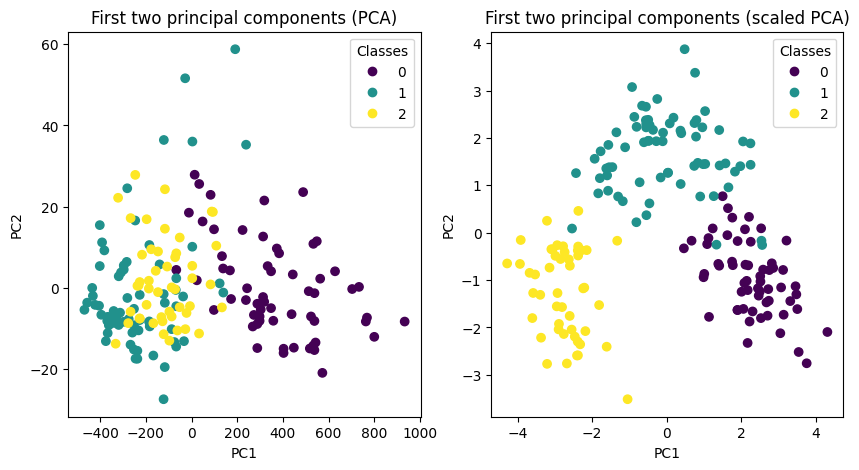

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

pca_wine = PCA(n_components=2)
pipe = Pipeline([('scale', StandardScaler()), ('pca', pca_wine)])
X_wine_scalePCA = pipe.fit_transform(X_wine)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, X in enumerate([X_wine_pca, X_wine_scalePCA]):
    sc = ax[i].scatter(X[:, 0], X[:, 1], c=y_wine)
    ax[i].legend(*sc.legend_elements(), title='Classes', loc='best')
    ax[i].set_xlabel("PC1")
    ax[i].set_ylabel("PC2")
    ax[i].set_title(f"First two principal components {'(PCA)' if i==0 else '(scaled PCA)'}")
plt.show()

#### 1.3. What % of information (“explained variance”) is preserved in the 2 PCA features?

In [5]:
# explained variance in percentage format
print("Explained variance ratios: ", pca_wine.explained_variance_ratio_)
print("Explained variance ratios (sum): ", pca_wine.explained_variance_ratio_.sum())

Explained variance ratios:  [0.36198848 0.1920749 ]
Explained variance ratios (sum):  0.554063383569353


### 2.[10 points. 1 hour.] Use 25% for testing for the Wine dataset. Plot a graph of the accuracy of the samples when using 1, 2, 3, …, 13 PCA features along with showing how much % variance is preserved (p%) for each? Use logistic regression.

In [6]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.25, random_state=0)

#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# PCA 1,...,13 components
for i in range(1,14):
    pipe_wine = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=i)), ('logreg', LogisticRegression())])
    pipe_wine.fit(X_train_wine, y_train_wine)
    y_pred_wine = pipe_wine.predict(X_test_wine)
    print("PCA components: ", i, " Explained Variance: ", pipe_wine.named_steps['pca'].explained_variance_ratio_.sum(), " Test accuracy: ", pipe_wine.score(X_test_wine, y_test_wine))


PCA components:  1  Explained Variance:  0.3728106810687163  Test accuracy:  0.8
PCA components:  2  Explained Variance:  0.5602106402185467  Test accuracy:  0.9777777777777777
PCA components:  3  Explained Variance:  0.6682227156532315  Test accuracy:  0.9777777777777777
PCA components:  4  Explained Variance:  0.7444213053778583  Test accuracy:  0.9777777777777777
PCA components:  5  Explained Variance:  0.8070405207215717  Test accuracy:  0.9777777777777777
PCA components:  6  Explained Variance:  0.8560046373473031  Test accuracy:  1.0
PCA components:  7  Explained Variance:  0.8977491369442264  Test accuracy:  1.0
PCA components:  8  Explained Variance:  0.9229085822108001  Test accuracy:  1.0
PCA components:  9  Explained Variance:  0.9463166346310776  Test accuracy:  1.0
PCA components:  10  Explained Variance:  0.9648058372279744  Test accuracy:  1.0
PCA components:  11  Explained Variance:  0.98043539691939  Test accuracy:  1.0
PCA components:  12  Explained Variance:  0.99312

### 3. [15 points. 2 hours.] Decision boundary. Plot the decision boundary for PCA-reduced 2 dimensions of the wine dataset. Use ML Perceptron in https://python-course.eu/machine-learning/neural-networks-with-scikit.php with 2 hidden layers.

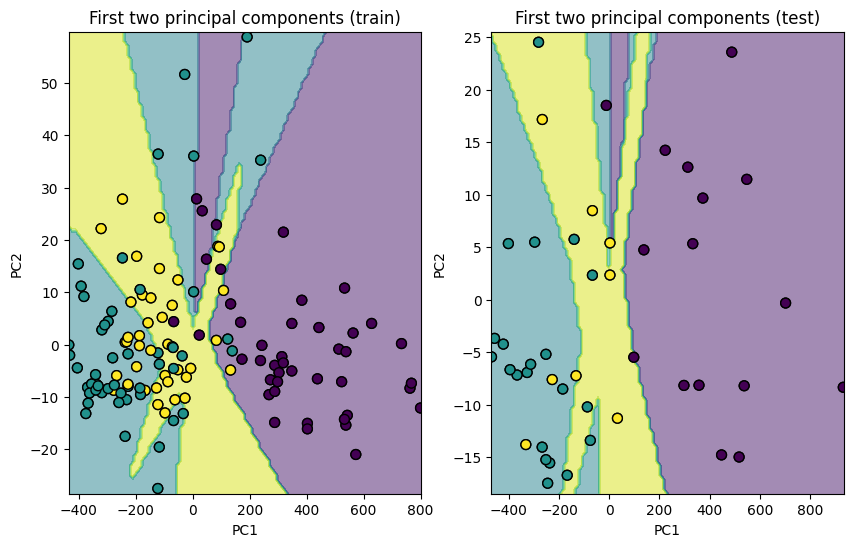

In [7]:
data_wine = load_wine()
X_wine = data_wine.data
y_wine = data_wine.target

# PCA
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_pca, y_wine, test_size=0.25, random_state=0)

# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100), random_state=21)
mlp.fit(X_train_wine, y_train_wine)

# Decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1,2, figsize=(10, 6))
for i, X in enumerate([X_train_wine, X_test_wine]):
    y = y_train_wine if i==0 else y_test_wine
    dbd = DecisionBoundaryDisplay.from_estimator(mlp, X, ax=ax[i], response_method='predict', alpha=0.5, zorder=1)
    ax[0].scatter(X_train_wine[:,0], X_train_wine[:,1], c=y_train_wine, s=50, edgecolors='k', zorder=2)
    ax[1].scatter(X_test_wine[:,0], X_test_wine[:,1], c=y_test_wine, s=50, edgecolors='k', zorder=2)
    ax[i].set_xlabel("PC1")
    ax[i].set_ylabel("PC2")
    ax[i].set_title(f"First two principal components {'(train)' if i==0 else '(test)'}")

plt.show()

### 4. Using the MNIST data of 784 dimensions (28 x 28 pixels).

In [8]:
from sklearn.datasets import load_digits
data_digits = load_digits()
X_digits = data_digits.data
y_digits = data_digits.target

#### 4.1. [5 points. 0.5 hours.] Show Quiz 7 problem #3 here again as a benchmark. Using 50,000 data samples for training and 20,000 for testing, apply standard scalar transform from the training dataset to both your training and testing datasets. Report the accuracy and print out the confusion matrix.

In [9]:
# import MNIST dataset
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data
X_mnist, y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True)
# Normalize intensity of images to make it in the range [0,1] since 255 is the max (white).
X_mnist = X_mnist / 255.0

print(X_mnist.shape)

(70000, 784)


In [10]:
# Split the data into train/test sets
X_train_mnist, X_test_mnist = X_mnist[:50000], X_mnist[20000:]
y_train_mnist, y_test_mnist = y_mnist[:50000], y_mnist[20000:]

classifier = MLPClassifier(
    hidden_layer_sizes=(50,20,10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train_mnist, y_train_mnist)

Iteration 1, loss = 0.47772268
Iteration 2, loss = 0.16435982
Iteration 3, loss = 0.12618247
Iteration 4, loss = 0.10649038
Iteration 5, loss = 0.09039465
Iteration 6, loss = 0.07945557
Iteration 7, loss = 0.07424755
Iteration 8, loss = 0.06643571
Iteration 9, loss = 0.05982603
Iteration 10, loss = 0.05655218
Iteration 11, loss = 0.04981067
Iteration 12, loss = 0.05127314
Iteration 13, loss = 0.04650352
Iteration 14, loss = 0.04558377
Iteration 15, loss = 0.04044781
Iteration 16, loss = 0.03830433
Iteration 17, loss = 0.03335348
Iteration 18, loss = 0.03522754
Iteration 19, loss = 0.03186215
Iteration 20, loss = 0.02899062
Iteration 21, loss = 0.03353281
Iteration 22, loss = 0.02710012
Iteration 23, loss = 0.03112358
Iteration 24, loss = 0.02556351
Iteration 25, loss = 0.02492123
Iteration 26, loss = 0.02868124
Iteration 27, loss = 0.02971985
Iteration 28, loss = 0.02299533
Iteration 29, loss = 0.01901845
Iteration 30, loss = 0.02214198
Iteration 31, loss = 0.02734307
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [11]:
# use standard scaler
from sklearn.preprocessing import StandardScaler
scaler_mnist = StandardScaler()
scaler_mnist.fit(X_train_mnist)

# tranform data by variance on the scaled 0-1
X_train_mnist = scaler_mnist.transform(X_train_mnist)
X_test_mnist = scaler_mnist.transform(X_test_mnist)

# fit the model on the training data
classifier.fit(X_train_mnist, y_train_mnist)

print("Training set Accuracy: %f" % classifier.score(X_train_mnist, y_train_mnist))
print("Test set Accuracy: %f" % classifier.score(X_test_mnist, y_test_mnist))

# predict
predictions_mnist = classifier.predict(X_test_mnist)


Iteration 1, loss = 0.45425788
Iteration 2, loss = 0.21481453
Iteration 3, loss = 0.17410422
Iteration 4, loss = 0.17102410
Iteration 5, loss = 0.13721921
Iteration 6, loss = 0.10472141
Iteration 7, loss = 0.08744720
Iteration 8, loss = 0.08416938
Iteration 9, loss = 0.08108691
Iteration 10, loss = 0.07766257
Iteration 11, loss = 0.06431345
Iteration 12, loss = 0.06260147
Iteration 13, loss = 0.05977419
Iteration 14, loss = 0.06121207
Iteration 15, loss = 0.05266282
Iteration 16, loss = 0.05347182
Iteration 17, loss = 0.05058064
Iteration 18, loss = 0.04717300
Iteration 19, loss = 0.04083716
Iteration 20, loss = 0.03751302
Iteration 21, loss = 0.04493942
Iteration 22, loss = 0.06049365
Iteration 23, loss = 0.04896608
Iteration 24, loss = 0.04423101
Iteration 25, loss = 0.03964135
Iteration 26, loss = 0.03783379
Iteration 27, loss = 0.04419121
Iteration 28, loss = 0.03728567
Iteration 29, loss = 0.04044066
Iteration 30, loss = 0.03627037
Iteration 31, loss = 0.03244111
Iteration 32, los

Text(0.5, 1.0, 'Accuracy Score: 0.96846')

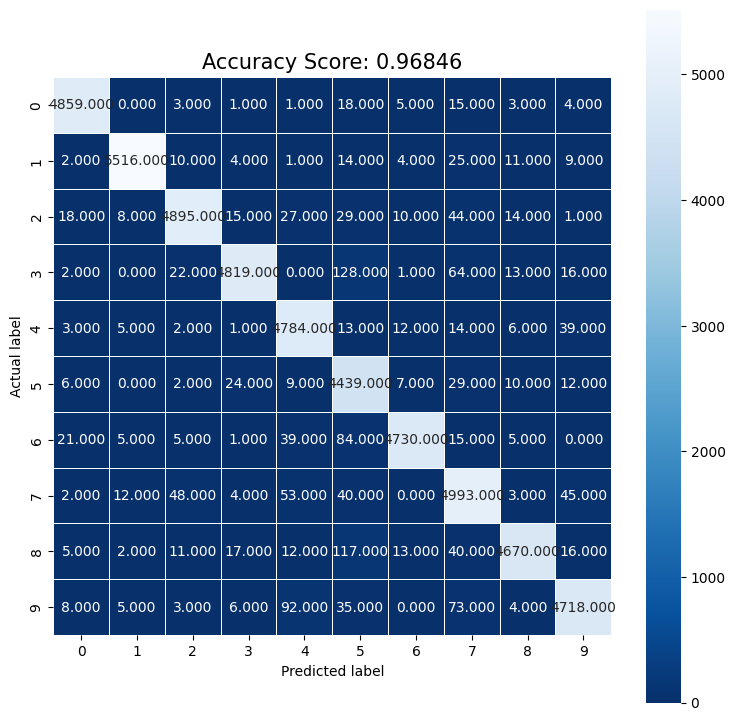

In [12]:
# confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_mnist, predictions_mnist)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test_mnist, y_test_mnist))
plt.title(all_sample_title, size = 15)

#### 4.2. [20 points. 2 hours.] Using the same neural network model as in 4.1 above, but using the PCA features that preserve up to 95% of the information content, find a new training and testing dataset using PCA transformation based on the training dataset. Apply standard scalar transform from the training dataset to both your training and testing datasets. Report the accuracy and print out the confusion matrix for PCA with reduced features.

In [13]:
# Pipeline with scaling and PCA
pca_mnist = PCA(n_components=0.95)
pipe = Pipeline([('scale', StandardScaler()), ('pca', pca_mnist)])
X_mnist_scalePCA = pipe.fit_transform(X_mnist)

# Split the data into train/test sets
X_train_mnist, X_test_mnist = X_mnist_scalePCA[:50000], X_mnist_scalePCA[20000:]
y_train_mnist, y_test_mnist = y_mnist[:50000], y_mnist[20000:]

# fit the model on the training data
classifier.fit(X_train_mnist, y_train_mnist)

print("Training set Accuracy: %f" % classifier.score(X_train_mnist, y_train_mnist))
print("Test set Accuracy: %f" % classifier.score(X_test_mnist, y_test_mnist))

Iteration 1, loss = 0.40363011
Iteration 2, loss = 0.25863084
Iteration 3, loss = 0.19776099
Iteration 4, loss = 0.14974467
Iteration 5, loss = 0.13275927
Iteration 6, loss = 0.12045507
Iteration 7, loss = 0.13127092
Iteration 8, loss = 0.11216671
Iteration 9, loss = 0.09294418
Iteration 10, loss = 0.10044737
Iteration 11, loss = 0.09029550
Iteration 12, loss = 0.08521892
Iteration 13, loss = 0.10966233
Iteration 14, loss = 0.08397632
Iteration 15, loss = 0.07676074
Iteration 16, loss = 0.07387315
Iteration 17, loss = 0.11215145
Iteration 18, loss = 0.70795212
Iteration 19, loss = 1.76105710
Iteration 20, loss = 2.04857251
Iteration 21, loss = 1.94383975
Iteration 22, loss = 1.89863115
Iteration 23, loss = 1.95046180
Iteration 24, loss = 2.10355295
Iteration 25, loss = 2.09626075
Iteration 26, loss = 2.06688622
Iteration 27, loss = 2.04629674
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set Accuracy: 0.207020
Test set Accuracy: 0.20

Text(0.5, 1.0, 'Accuracy Score: 0.20634')

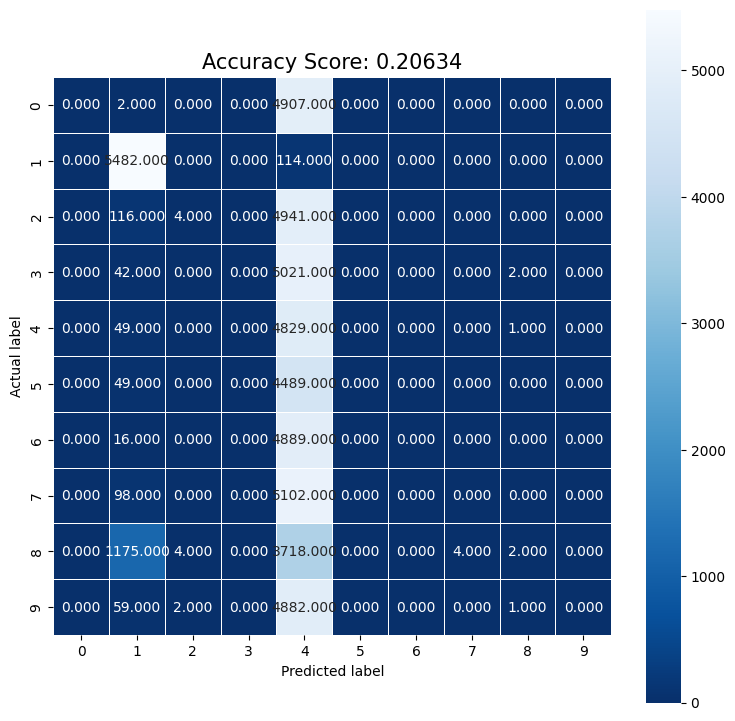

In [14]:
# predict
predictions_mnist = classifier.predict(X_test_mnist)

# confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_mnist, predictions_mnist)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test_mnist, y_test_mnist))
plt.title(all_sample_title, size = 15)